# Working with HTML Pages

## Parsing XML and HTML

In [4]:
from lxml import objectify
import pandas as pd
from distutils import util

xml = objectify.parse(open('XMLData.xml'))
root = xml.getroot()

#df stands for data frame.
df = pd.DataFrame(columns=('Number', 'Boolean'))

#the code relies on the ordinal number.
for i in range(0, 4):
    obj = root.getchildren()[i].getchildren()
    row = dict(zip(['Number', 'Boolean'], 
                   [obj[0].pyval, 
                    
#To turn <Boolean> element to string, you do the following:
                    bool(util.strtobool(obj[2].text))]))
    row_s = pd.Series(row)
    row_s.name = obj[1].text
    df = df.append(row_s)
    
print(type(df.loc['First']['Number']))
print(type(df.loc['First']['Boolean']))

KeyError: 'First'

In [1]:
from lxml import objectify
import pandas as pd
from distutils import util

xml = objectify.parse(open('XMLData.xml'))
root = xml.getroot()
df = pd.DataFrame(columns=('Number', 'Boolean'))

#The code loops through the root node's children, it extracts a list cintaining the following.
#strtobool in distutils.util converts string to a numeric value.
#To create a boolean value, you must convert the 0 or 1 using bool()
for i in range(0, 4):
    obj = root.getchildren()[i].getchildren()
    row = dict(zip(['Number', 'Boolean'], 
                   [obj[0].pyval, 
#To turn <Boolean> element to string, you do the following:
                    bool(util.strtobool(obj[2].text))]))
    row_s = pd.Series(row)
    row_s.name = obj[1].text 
    
    df = pd.concat([df, row_s])
    df = df.reset_index(drop=True)
    
print(type(df.loc[1]['Number']))  # <----You provide an index value using loc and then access the feature using a second index.
print(type(df.loc[1]['Boolean']))   

<class 'float'>
<class 'float'>


## Using XPath for data extraction

In [2]:
from lxml import objectify
import pandas as pd
from distutils import util

#Import the data
xml = objectify.parse(open('XMLData.xml'))
#Obtaining the root node.
root = xml.getroot()

#Because the XML file entries are all strings, you must use the map() function to convert the strings to appropriate values.
#The xpath function accepts a path from the root node to the data you need, which is 'Record/Number' in this case.
map_number = map(int, root.xpath('Record/Number'))

#double mapping is not allowed. To overcome this obstacle, you perform a triple mapping and convert the data to a string using 
#the str() function first.
map_bool = map(str, root.xpath('Record/Boolean'))
map_bool = map(util.strtobool, map_bool)
map_bool = map(bool, map_bool)
map_string = map(str, root.xpath('Record/String'))

#Adding all the rows at one time by using data.
data = list(zip(map_number, map_bool))

df = pd.DataFrame(data, 
                  columns=('Number', 'Boolean'), 
                  #adding the row names is accomplished by setting the index parameter to a mapped version of the xpath() output 
                  #for the 'Record/String' path.
                  index = list(map_string))

print(df)
print(type(df.loc['First']['Number']))
print(type(df.loc['First']['Boolean']))

        Number  Boolean
First        1     True
Second       2    False
Third        3     True
Fourth       4    False
<class 'numpy.int64'>
<class 'numpy.bool_'>


# Working with Raw Text

## Stemming and removing stop words

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gokce\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
pip install --upgrade scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.2 MB 10.2 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.2 MB 13.3 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/9.2 MB 16.5 MB/s eta 0:00:01
   -------------- ------------------------- 3.3/9.2 MB 19.0 MB/s eta 0:00:01
   ----------------- ---------------------- 4.1/9.2 MB 19.9 MB/s eta 0:00:01
   ----------------- ---------------------- 4.1/9.2 MB 15.5 MB/s eta 0:00:01
   -------------------- ------------------- 4.6/9.2 MB 15.6 MB/s eta 0:00:01
   ------------------------ --------------- 5.7/9.2 MB 15.9 MB/s eta 0:00:01
   ---------------------------- ----------- 6.5/9.2 MB 16.7 MB/s eta 0:00:01
   -----------------

In [1]:
from sklearn.feature_extraction.text import * 
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

#The example creates a vocabulary using a test sentence. == vocab.
vocab = ['Sam loves swimming so he swims all the time']

#To hold a list of stem words. tokenizer parameter defines the function used to
#stem the words.
vect = CountVectorizer(tokenizer=tokenize, 
                           stop_words='english')

#The vocabulary is fit to anoter vector, vec, for transformation step.
vec = vect.fit(vocab)

sentence1 = vec.transform(['George loves swimming too!'])

#The first output is the stemmed words.
#All the stop words are missing, e.g., so, he, all, or the.
print(vec.get_feature_names_out())


#The second output shows how many times the stemmed words are found.
print(sentence1.toarray())

['love' 'sam' 'swim' 'time']
[[1 0 1 0]]


C:\Users\gokce\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\gokce\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'there

## Introducing regular expressions

In [2]:
import re

data1 = 'My phone number is: 800-555-1212.'
data2 = '800-555-1234 is my phone number.'

#You have to create a pattern, always read a pattern from left to right.
#use .compile function from re, so Python does not create the pattern over and over.
#\d matches digits, three digits-three digits-four digits.
pattern = re.compile(r'(\d{3})-(\d{3})-(\d{4})')


dmatch1 = pattern.search(data1).groups()
dmatch2 = pattern.search(data2).groups()

print(dmatch1)
print(dmatch2)

('800', '555', '1212')
('800', '555', '1234')


# Using the Bag of Words Model and Beyond

## Understanding the bag of words model

In [3]:

#The call to fetch_20newgroups () loads dataset into memory.
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

categories = ['comp.graphics', 'misc.forsale', 
              'rec.autos', 'sci.space']

#Now, I have a bunch of data to use. But, the algortihm isn't trained.
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories, 
                                  shuffle=True, 
                                  random_state=42)

count_vect = CountVectorizer()

#scipy.parse matrix is a data structure that lets you store only the nonzero elements
#to save some space. The codes places the resulting bag into X_train_counts.
X_train_counts = count_vect.fit_transform(
    twenty_train.data)

#Number of entries are printed.
print("BOW shape:", X_train_counts.shape)
#Number of 'Caltech'
caltech_idx = count_vect.vocabulary_['caltech']
print('"Caltech": %i' % X_train_counts[0, caltech_idx]) 

BOW shape: (2356, 34750)
"Caltech": 3


## Working with n-grams

In [10]:

#fetch means 'gidip getirmek'
#import* == import everything.
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

categories = ['sci.space']

#Dataset is placed into a bunch.
twenty_train = fetch_20newsgroups(subset='train', 
                                  categories=categories, 
                                  remove=('headers', 
                                          'footers', 
                                          'quotes'),
                                  shuffle=True, 
                                  random_state=42)

#analyzer parameter determines how the app. creates the n-grams.
#count vectorizer converts text to numerical data.
count_chars = CountVectorizer(analyzer='char_wb', 
                              #(min n-gram size, max n-gram size)
                              ngram_range=(3,3), 
                              max_features=10) # <----- vectorizer returns ten features.

count_chars.fit(twenty_train['data'])

#stop words are removed.
count_words = CountVectorizer(analyzer='word', 
                              #two words
                              ngram_range=(2,2),
                              max_features=10,
                              stop_words='english')

count_words.fit(twenty_train['data'])

X = count_chars.transform(twenty_train.data)

#Top ten trigrams for characters from the document.
print(count_chars.get_feature_names_out())
#The frequency
print(X[1].todense())
#Top ten trigrams for words.
print(count_words.get_feature_names_out())

[' an' ' in' ' of' ' th' ' to' 'he ' 'ing' 'ion' 'nd ' 'the']
[[0 0 2 5 1 4 2 2 0 5]]
['anonymous ftp' 'commercial space' 'gamma ray' 'nasa gov'
 'national space' 'remote sensing' 'sci space' 'space shuttle'
 'space station' 'washington dc']


## Implementing TF-IDF transformations

In [18]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

categories = ['comp.graphics', 'misc.forsale', 
              'rec.autos', 'sci.space']

#Fetch + Word bag.
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories, 
                                  shuffle=True, 
                                  random_state=42)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(
    twenty_train.data)

#It converts the raw newgroup documents into a matrix of TF-IDF features.
tfidf = TfidfTransformer(use_idf=True).fit(X_train_counts)
#tfidf = TfidfTransformer().fit(X_train_counts)
X_train_tfidf = tfidf.transform(X_train_counts)

caltech_idx = count_vect.vocabulary_['caltech']
print('"Caltech" scored in a BOW:')
print('count: %0.3f' % X_train_counts[0, caltech_idx])
print('TF-IDF: %0.3f' % X_train_tfidf[0, caltech_idx])

"Caltech" scored in a BOW:
count: 3.000
TF-IDF: 0.123


In [19]:
import numpy as np
count = np.mean(X_train_counts[X_train_counts>0])
tfif = np.mean(X_train_tfidf[X_train_tfidf>0])
print('mean count: %0.3f' % np.mean(count))
print('mean TF-IDF: %0.3f' % np.mean(tfif))

mean count: 1.698
mean TF-IDF: 0.064


# Working with Graph Data

## Using NetworkX basics

In [1]:
import networkx as nx

#It creates a graph using the cycle graph template.
#The graph contains ten nodes.
G = nx.cycle_graph(10)

#Creates the adjaceny matrox from the graph.
A = nx.adjacency_matrix(G)

print(A.todense())

[[0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]]


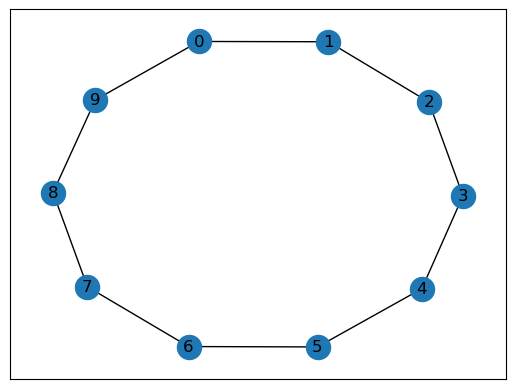

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
nx.draw_networkx(G)
plt.show()

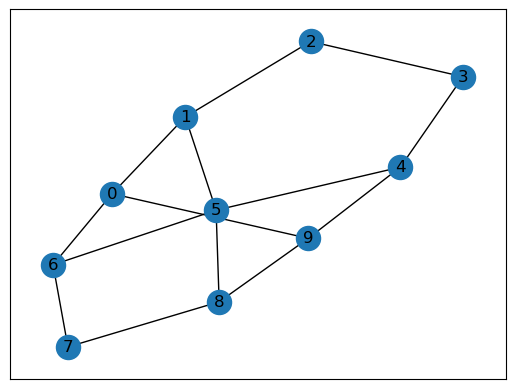

In [9]:
#You can add an edge btw. nodes 1 and 5.
G.add_edge(1,5)
G.add_edge(5,8)
G.add_edge(4,9)
G.add_edge(6,0)
nx.draw_networkx(G)
plt.show()